<a href="https://colab.research.google.com/github/saku-s3/21101597_-_-/blob/main/%5BAI2025_Assignment%5D_CIFAR10_Classification_21101597_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 Classification

## Import Packages

In [20]:
import sys
import pandas as pdㅜ
import tensorflow as tf
import matplotlib.pyplot as plt

### Data Preparation
Use CIFAR10 handwriting dataset

In [21]:
cifar10 = tf.keras.datasets.cifar10

Prepare data for training

In [22]:
# train / test split
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# minmax normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Compile and Train neural network

## CNN Modeling
Create a convolutional neural network

### Goal

Improve the provided basic CNN model and achieve CIFAR-10 **test accuracy ≥ 75%**.


Modify the network architecture!

In [45]:
model = tf.keras.models.Sequential([

    # Convolutional layer. Learn 64 filters using a 3x3 kernel
    tf.keras.layers.Conv2D(
        64, (3, 3), activation="relu",padding="same", input_shape=(32, 32, 3)
    ),
    # Max-pooling layer, using 2x2 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),

    # Convolutional layer. Learn 128 filters using a 3x3 kernel
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu",padding="same"),
    # Max-pooling layer, using 2x2 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),

    # Convolutional layer. Learn 246 filters using a 3x3 kernel
    tf.keras.layers.Conv2D(256, (3, 3), activation="relu",padding="same"),
    # Max-pooling layer, using 2x2 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),



    # Flatten units
    tf.keras.layers.Flatten(),

    # Add a hidden layer with dropout
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    # Add a hidden layer with dropout
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    # Add an output layer with output units for all 10 digits
    tf.keras.layers.Dense(10, activation="softmax")
])

# 초반 dropout을 줄여 오차를 줄이고자하였고 padding same을 통해 정보 손실을 줄였다.

# Compile and Train neural network

In [46]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
history = model.fit(x_train, y_train, epochs= 20)
# 에폭수가 적어 accuracy가 낮게 나와 에폭을 증가했다.

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.3114 - loss: 1.8304
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5567 - loss: 1.2492
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6180 - loss: 1.0819
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6534 - loss: 0.9976
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6780 - loss: 0.9245
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6952 - loss: 0.8811
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7016 - loss: 0.8572
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7129 - loss: 0.8272
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7201 - loss: 0.8066
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7252 - loss: 0.7934
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7328 - loss: 0.7759
Epoch 12/20
1563/1563 ━━━━━━

## Evaluate neural network performance


In [47]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 2s - 7ms/step - accuracy: 0.7628 - loss: 0.7087


[0.708732545375824, 0.7627999782562256]

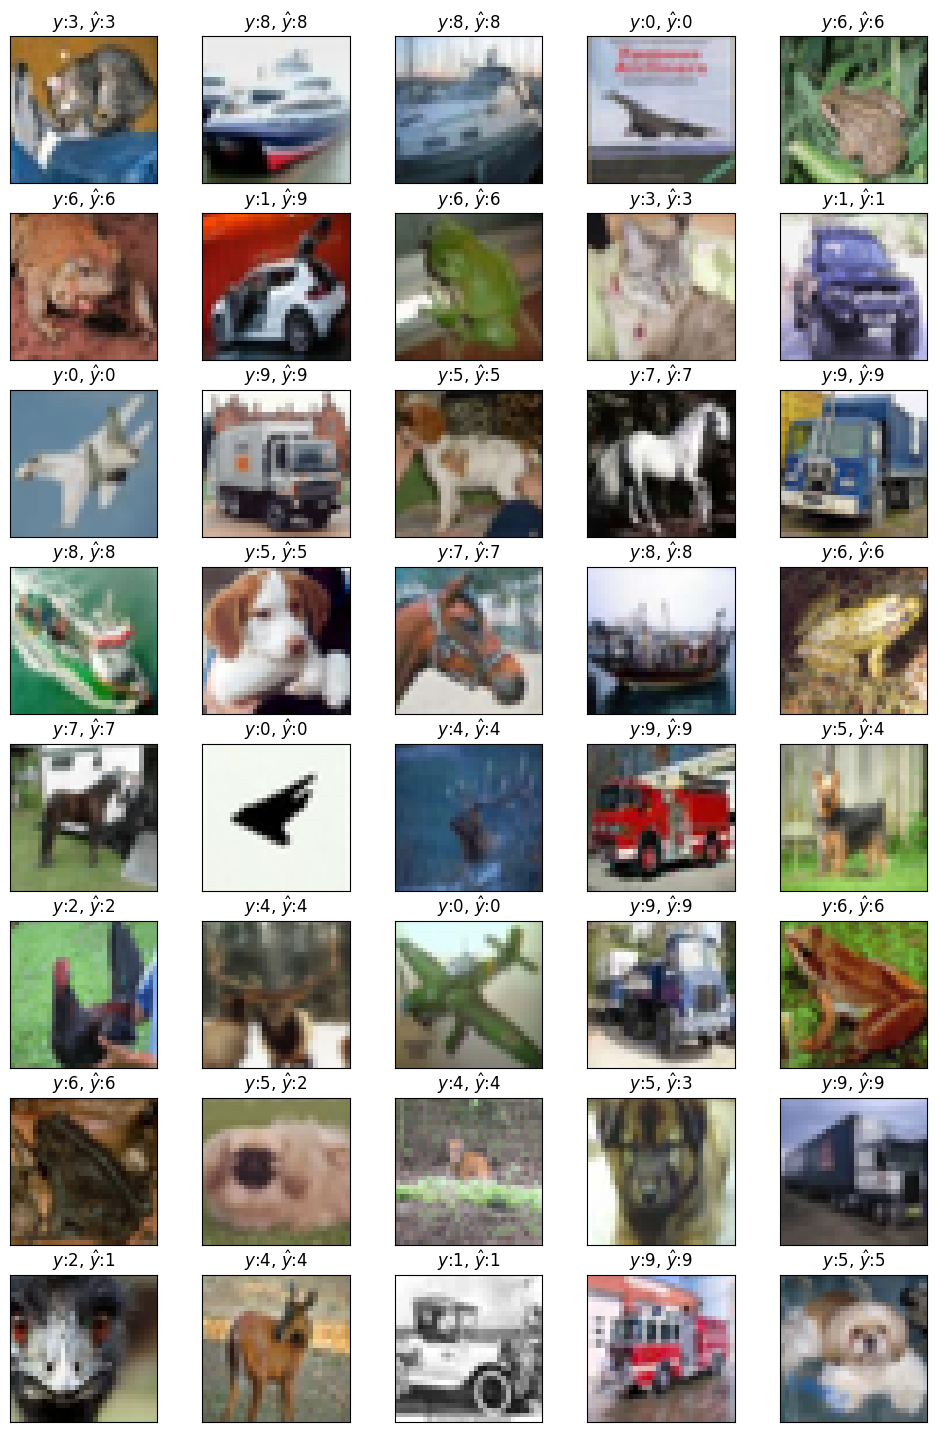

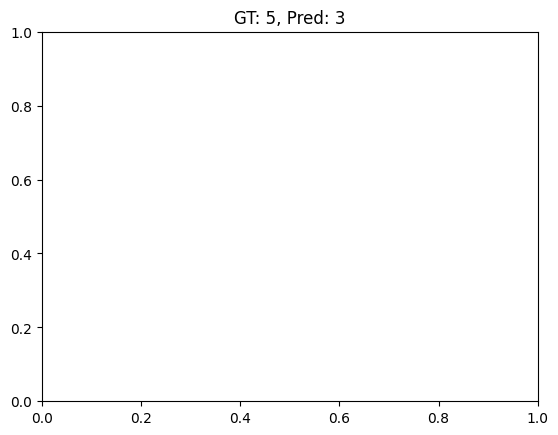

In [48]:
prob = model.predict(x_test[0:40], verbose=0)
pred = tf.argmax(prob, axis=1)


fig = plt.figure(figsize=(12, 18))
for i in range(40):
    subplot = fig.add_subplot(8, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    string = r'$\hat{y}$'
    subplot.set_title(f'$y$:{tf.argmax(y_test[i])}, {string}:{pred[i].numpy()}')
    subplot.imshow(tf.squeeze(x_test[i]))
plt.show()

true_label = tf.argmax(y_test[i]).numpy()
pred_label = pred[8].numpy()
plt.title(f"GT: {true_label}, Pred: {pred_label}")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)



In [49]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.7627999782562256
